# 1. Setup

In [1]:
import pandas as pd

# 2. Read in n2010 Data

In [2]:
pop_2010 = pd.read_csv('sample_data/US_Census_SUB-IP-EST2019-ANNRNK_top_20_2010.csv', index_col = [0], squeeze = True)
pop_2010

<ipython-input-2-345ebbe540ae>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  pop_2010 = pd.read_csv('sample_data/US_Census_SUB-IP-EST2019-ANNRNK_top_20_2010.csv', index_col = [0], squeeze = True)


City
New York                8190209
Los Angeles             3795512
Chicago                 2697477
Houston                 2100280
Phoenix                 1449038
Philadelphia            1528283
San Antonio             1332299
San Diego               1305906
Dallas                  1200350
San Jose                 954940
Austin                   806164
Jacksonville             823114
Fort Worth               748441
Columbus                 790943
Charlotte                738444
San Francisco            805505
Indianapolis             821579
Seattle                  610630
Denver                   603359
District of Columbia     605226
Name: 2010, dtype: int64

# 3. Calculate Population frof 2010

In [4]:
top_3_2010 = sum(pop_2010[['New York', 'Los Angeles', 'Chicago']])


# 4. Read in 2019 Data


In [3]:
pop_2019 = pd.read_csv('sample_data/US_Census_SUB-IP-EST2019-ANNRNK_top_20_2019.csv', index_col = [0], squeeze = True)
pop_2019

<ipython-input-3-189eea00eca6>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  pop_2019 = pd.read_csv('sample_data/US_Census_SUB-IP-EST2019-ANNRNK_top_20_2019.csv', index_col = [0], squeeze = True)


City
New York                8336817
Los Angeles             3979576
Chicago                 2693976
Houston                 2320268
Phoenix                 1680992
Philadelphia            1584064
San Antonio             1547253
San Diego               1423851
Dallas                  1343573
San Jose                1021795
Austin                   978908
Jacksonville             911507
Fort Worth               909585
Columbus                 898553
Charlotte                885708
San Francisco            881549
Indianapolis             876384
Seattle                  753675
Denver                   727211
District of Columbia     705749
Name: 2019, dtype: int64

# 5. Cacluate total population for 2019

In [5]:
top_3_2019 = sum(pop_2019[['New York', 'Los Angeles', 'Chicago']])

# 6. Percentage Change

In [8]:
top_3_change = 100 * (top_3_2019 - top_3_2010) / top_3_2010
all_change = 100 * sum(pop_2019 - pop_2010) / sum(pop_2010)
print('Top 3 change: ', str(round(top_3_change, 1)), '%')
print('All change: ', str(round(all_change, 1)), '%')

Top 3 change:  2.2 %
All change:  8.0 %


# Data Visualization

<ipython-input-32-8a24c2a12ce3>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  pop_2010 = pd.read_csv('sample_data/US_Census_SUB-IP-EST2019-ANNRNK_top_20_2010.csv', index_col=0, squeeze=True)
<ipython-input-32-8a24c2a12ce3>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  pop_2019 = pd.read_csv('sample_data/US_Census_SUB-IP-EST2019-ANNRNK_top_20_2019.csv', index_col=0, squeeze=True)


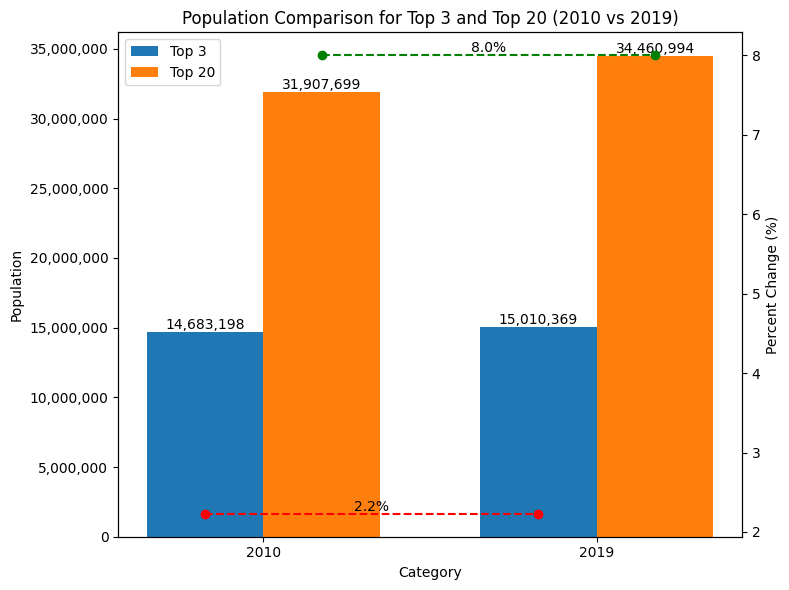

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Read the population data for 2010 and 2019
pop_2010 = pd.read_csv('sample_data/US_Census_SUB-IP-EST2019-ANNRNK_top_20_2010.csv', index_col=0, squeeze=True)
pop_2019 = pd.read_csv('sample_data/US_Census_SUB-IP-EST2019-ANNRNK_top_20_2019.csv', index_col=0, squeeze=True)

# Calculate the sums for the Top 3 and Top 20 categories for each year
sum_top_3 = [pop_2010.head(3).sum(), pop_2019.head(3).sum()]
sum_top_20 = [pop_2010.sum(), pop_2019.sum()]

# Calculate the percent change from 2010 to 2019 for each group
percent_change_top_3 = ((sum_top_3[1] - sum_top_3[0]) / sum_top_3[0]) * 100
percent_change_top_20 = ((sum_top_20[1] - sum_top_20[0]) / sum_top_20[0]) * 100

# Create a list of years
years = ['2010', '2019']

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(years))

ax1.bar(index, sum_top_3, width=bar_width, label='Top 3')
ax1.bar(index + bar_width, sum_top_20, width=bar_width, label='Top 20')

# Add formatted labels on top of each bar
for i, v in enumerate(sum_top_3):
    ax1.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
for i, v in enumerate(sum_top_20):
    ax1.text(i + bar_width, v, f'{v:,.0f}', ha='center', va='bottom')

# Customize the left y-axis (population)
ax1.set_xlabel('Category')
ax1.set_ylabel('Population')
ax1.set_title('Population Comparison for Top 3 and Top 20 (2010 vs 2019)')
ax1.set_xticks(index + bar_width/2)
ax1.set_xticklabels(years)
ax1.legend()

# Create a second y-axis for percent change
ax2 = ax1.twinx()

# Plot lines for percent change
ax2.plot([0, 1], [percent_change_top_3, percent_change_top_3], 'r--o', label='Top 3 Percent Change')
ax2.plot([0 + bar_width, 1 + bar_width], [percent_change_top_20, percent_change_top_20], 'g--o', label='Top 20 Percent Change')
ax2.set_ylabel('Percent Change (%)')

# Add labels on the lines indicating percent change
ax2.text(0.5, percent_change_top_3, f'{percent_change_top_3:.1f}%', ha='center', va='bottom')
ax2.text(0.5 + bar_width, percent_change_top_20, f'{percent_change_top_20:.1f}%', ha='center', va='bottom')

# Format y-axis labels for population with commas
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Show the chart
plt.tight_layout()
plt.show()